### Importing needed packages

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.font_manager import FontProperties

### Exploring non-spatial data

In [3]:
geodata = gpd.read_file('Data/Non-spatial/geodata.csv')
geodata.drop(['field_1'], axis=1, inplace=True)

In [4]:
geodata.head()

,Job_title,Company_name,Location,FILE_NAME,geometry
0,Graduate Geospatial Specialist - Infrastructur...,Arup,"Solihull, England, United Kingdom",WEST_MIDLANDS_ENGLISH_REGION,None
1,GIS Analyst,Jacobs,"Manchester, England, United Kingdom",NORTH_WEST_ENGLISH_REGION,None
2,GIS Analyst,Jacobs,"Wokingham, England, United Kingdom",SOUTH_EAST_ENGLISH_REGION,None
3,Geospatial Developer,Jacobs,"Manchester, England, United Kingdom",NORTH_WEST_ENGLISH_REGION,None
4,Graduate Geospatial Specialist - Infrastructur...,Arup,"Bristol, England, United Kingdom",SOUTH_WEST_ENGLISH_REGION,None


In [5]:
#How many unique company names, job titles and locations are there?
print(f"There are {geodata['Company_name'].nunique()} unique company names in the dataset", '\n')

print(f"There are {geodata['Job_title'].nunique()} unique job titles in the dataset", '\n')

print(f"There are {geodata['Location'].nunique()} unique UK locations in the dataset", '\n')

There are 234 unique company names in the dataset 

There are 351 unique job titles in the dataset 

There are 118 unique UK locations in the dataset 



In [6]:
#Finding the number of jobs that each company is hiring for 
company_jobs_dict = {'company_name':[], 'number_of_open_roles':[]} #new dictionary initialized

company_names = geodata['Company_name'].unique()
for name in company_names:
    #print(f" {name} are hiring for {len(geodata[geodata['Company_name']==name])} number of job(s)", '\n')
    company_jobs_dict['company_name'].append(name)
    company_jobs_dict['number_of_open_roles'].append(len(geodata[geodata['Company_name']==name]))
    
company_jobs_dict

{'company_name': ['Arup',
  'Jacobs',
  'Royal HaskoningDHV',
  'Balfour Beatty plc',
  'Ridge and Partners LLP',
  'Lorien',
  'Planet',
  'Ordnance Survey',
  'Department for Digital, Culture, Media and Sport (DCMS)',
  'Stantec',
  'Harnham',
  'FloodFlash',
  'Mott MacDonald',
  'Milton Keynes Council',
  'Buro Happold',
  'JLL Technologies',
  'Tetra Tech',
  '2Excel Aviation Ltd',
  'Amey',
  'Hays',
  'Sheer Jobs Limited',
  'Atkins',
  'Rigour Survey',
  'PUBLIC PRACTICE',
  'HR Wallingford',
  'Methods Analytics',
  'Satellite Vu',
  'BT',
  'Thomson Environmental Consultants',
  'Prodapta',
  '1st Horizon Surveying & Engineering Ltd',
  'Auckland Transport',
  'Travail Employment Group Ltd.',
  'JLL',
  '1Spatial',
  'Trimble Inc.',
  'Natural England',
  'Richard Wheeler Associates',
  'Climate X',
  'Dstl',
  'MOLA (Museum of London Archaeology)',
  'networx | Recruitment Software & Services',
  'AiDash',
  'DXC Technology',
  'AECOM',
  'Michael Page',
  'Office for Nation

In [7]:
company_jobs_df = pd.DataFrame(company_jobs_dict)
company_jobs_df = company_jobs_df.sort_values(by='number_of_open_roles', ascending=True)
company_jobs_df.head()

,company_name,number_of_open_roles
233,WhereIsMyTransport,1
101,ersg Ltd,1
163,Hammer Missions,1
164,MLR Associates Ltd,1
166,Jefferson Frank,1


Text(0.5, 0, 'Number of open roles')

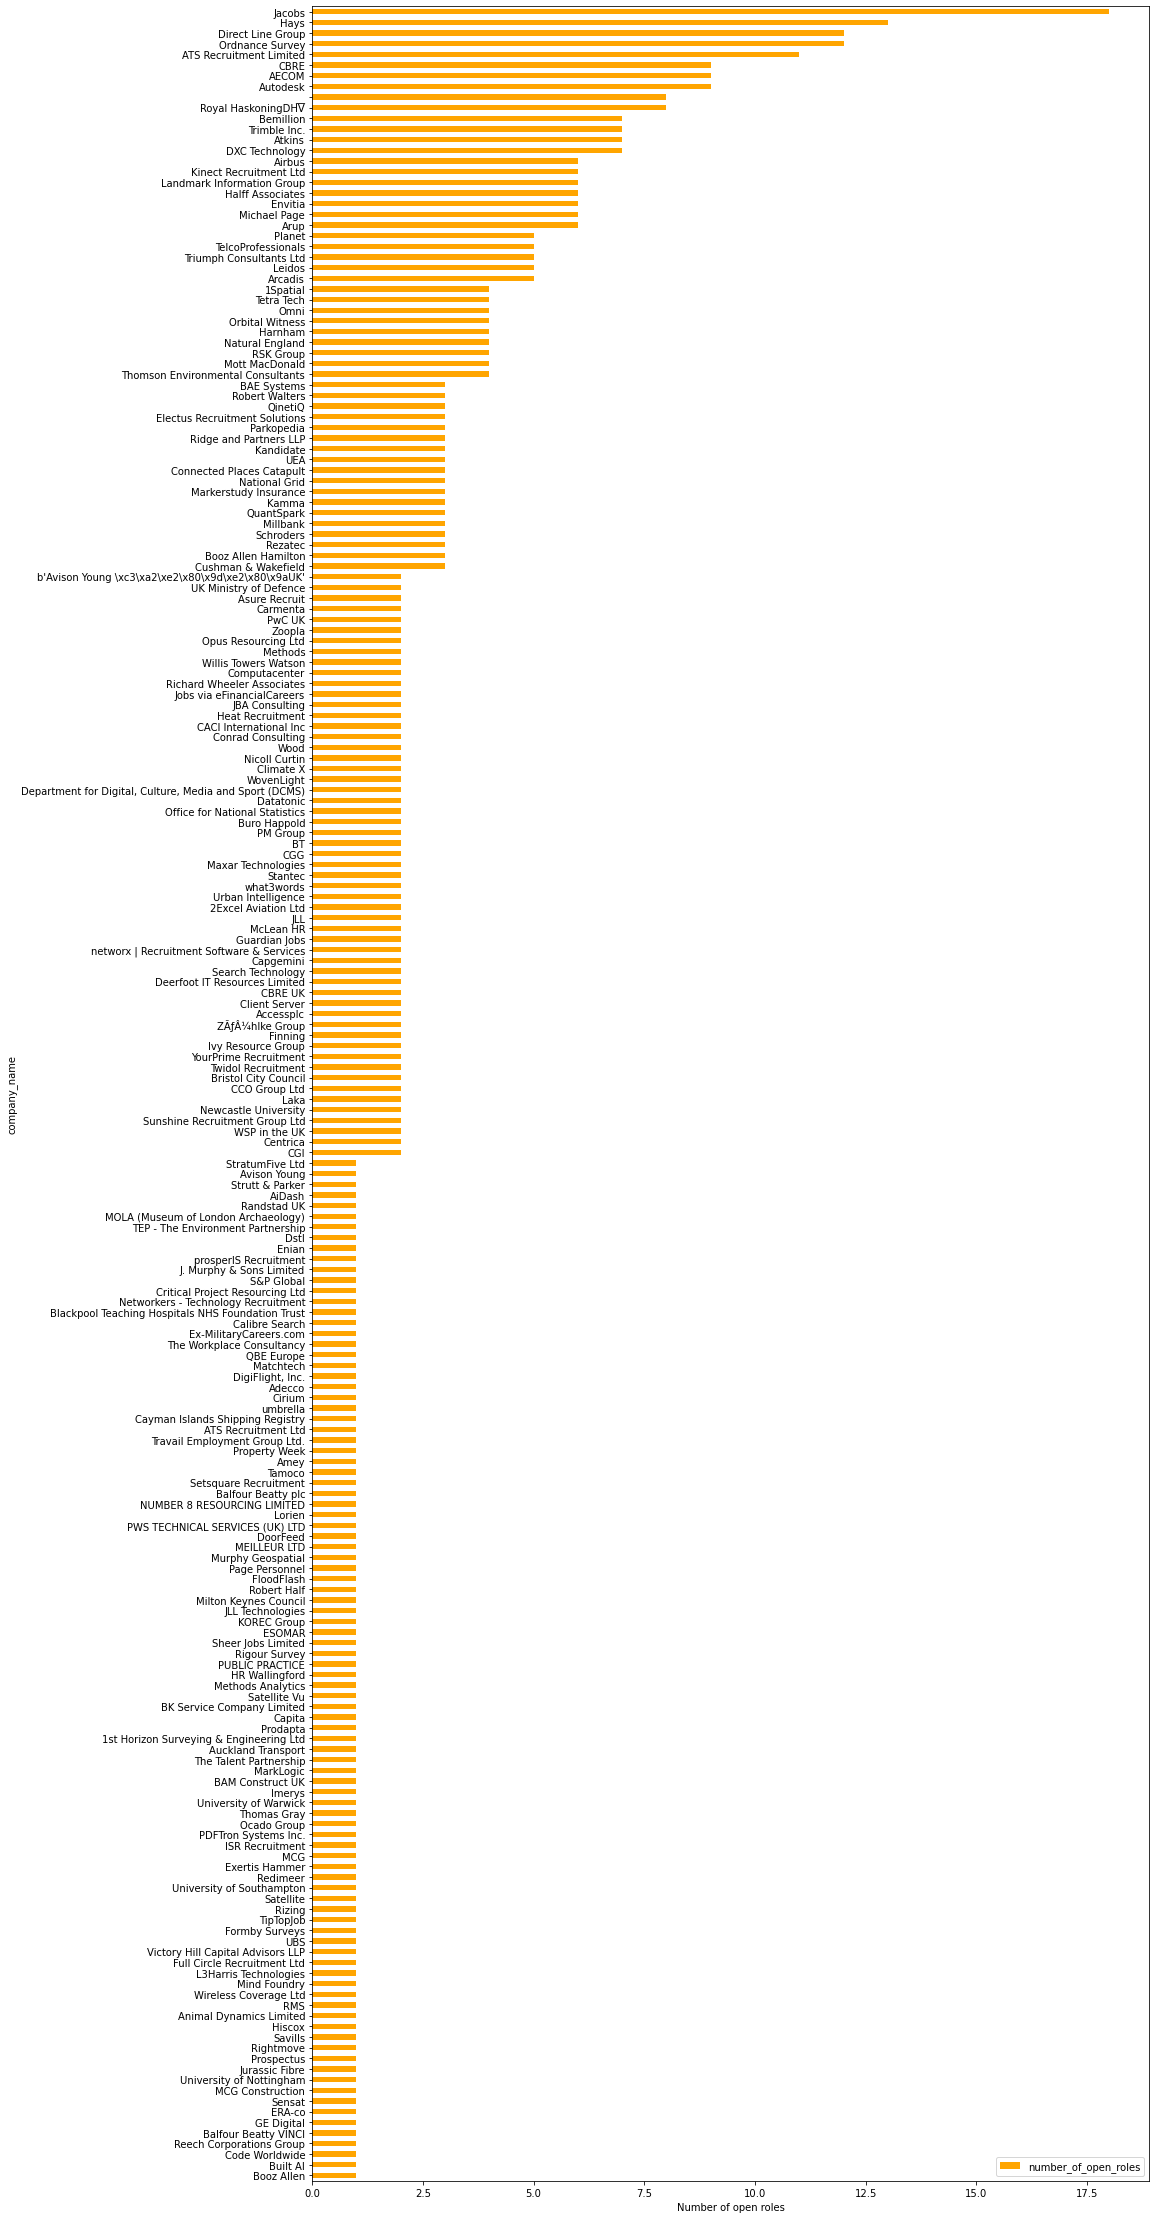

In [8]:
company_jobs_df[30:].plot.barh(x='company_name', y='number_of_open_roles', color='orange', figsize=(15, 40))
plt.xlabel('Number of open roles')

### Exploring spatial data

In [9]:
english_boundary = gpd.read_file('Data/Spatial/english_region_region.shp')
english_boundary

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,TYPE_COD0,DESCRIPT1,DESCRIPT0,geometry
0,Eastern English Region,ER,English Region,EASTERN_ENGLISH_REGION,931,931,124430,41425,E12000006,1958472.175,45230.119,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((592864.000 347304.570, 592877...."
1,North West English Region,ER,English Region,NORTH_WEST_ENGLISH_REGION,932,932,126756,41431,E12000002,1491508.768,75020.378,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((356180.304 588517.398, 356353.499 58..."
2,North East English Region,ER,English Region,NORTH_EAST_ENGLISH_REGION,933,933,127015,41422,E12000001,867550.671,7673.466,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((356180.304 588517.398, 356204...."
3,South East English Region,ER,English Region,SOUTH_EAST_ENGLISH_REGION,936,936,70735,41421,E12000008,1939992.712,31235.337,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((554503.796 178268.500, 554535...."
4,South West English Region,ER,English Region,SOUTH_WEST_ENGLISH_REGION,937,937,125094,41427,E12000009,2438520.357,53522.154,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((418405.400 244240.396, 418414...."
5,East Midlands English Region,ER,English Region,EAST_MIDLANDS_ENGLISH_REGION,2126,2126,124952,41423,E12000004,1581072.336,16739.969,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((406087.197 404640.102, 406105.204 40..."
6,London English Region,ER,English Region,LONDON_ENGLISH_REGION,2127,2127,124433,41428,E12000007,159469.700,2129.716,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((503946.104 190047.399, 503941.099 19..."
7,West Midlands English Region,ER,English Region,WEST_MIDLANDS_ENGLISH_REGION,2177,2177,125096,41426,E12000005,1300373.756,0.000,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((445790.299 252455.405, 445782.903 25..."
8,Yorkshire and the Humber English Region,ER,English Region,YORKSHIRE_AND_THE_HUMBER_ENGLISH_REGION,2178,2178,124954,41430,E12000003,1556035.579,15212.737,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((478799.000 519215.100, 478803.500 51..."


<AxesSubplot:>

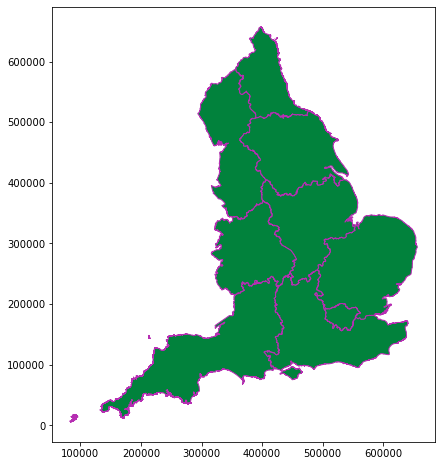

In [10]:
english_boundary.plot(color='#01823C', edgecolor='#B72EB3', figsize=(8, 8))

### Merging Spatial and Non-Spatial Data

In [11]:
geodata['job_count'] =1
geodata.head()

,Job_title,Company_name,Location,FILE_NAME,geometry,job_count
0,Graduate Geospatial Specialist - Infrastructur...,Arup,"Solihull, England, United Kingdom",WEST_MIDLANDS_ENGLISH_REGION,None,1
1,GIS Analyst,Jacobs,"Manchester, England, United Kingdom",NORTH_WEST_ENGLISH_REGION,None,1
2,GIS Analyst,Jacobs,"Wokingham, England, United Kingdom",SOUTH_EAST_ENGLISH_REGION,None,1
3,Geospatial Developer,Jacobs,"Manchester, England, United Kingdom",NORTH_WEST_ENGLISH_REGION,None,1
4,Graduate Geospatial Specialist - Infrastructur...,Arup,"Bristol, England, United Kingdom",SOUTH_WEST_ENGLISH_REGION,None,1


In [12]:
geodata_jcount = geodata.copy()
geodata_jcount = geodata_jcount.drop(['Location', 'geometry'], axis=1)
job_count = geodata_jcount.groupby(['FILE_NAME']).sum()
job_count

,job_count
FILE_NAME,
EASTERN_ENGLISH_REGION,46
EAST_MIDLANDS_ENGLISH_REGION,6
LONDON_ENGLISH_REGION,223
NORTH_EAST_ENGLISH_REGION,10
NORTH_WEST_ENGLISH_REGION,34
SOUTH_EAST_ENGLISH_REGION,100
SOUTH_WEST_ENGLISH_REGION,56
WEST_MIDLANDS_ENGLISH_REGION,33
YORKSHIRE_AND_THE_HUMBER_ENGLISH_REGION,22


In [13]:
england_job_count = english_boundary.merge(job_count, on = 'FILE_NAME')
england_job_count

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,TYPE_COD0,DESCRIPT1,DESCRIPT0,geometry,job_count
0,Eastern English Region,ER,English Region,EASTERN_ENGLISH_REGION,931,931,124430,41425,E12000006,1958472.175,45230.119,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((592864.000 347304.570, 592877....",46
1,North West English Region,ER,English Region,NORTH_WEST_ENGLISH_REGION,932,932,126756,41431,E12000002,1491508.768,75020.378,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((356180.304 588517.398, 356353.499 58...",34
2,North East English Region,ER,English Region,NORTH_EAST_ENGLISH_REGION,933,933,127015,41422,E12000001,867550.671,7673.466,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((356180.304 588517.398, 356204....",10
3,South East English Region,ER,English Region,SOUTH_EAST_ENGLISH_REGION,936,936,70735,41421,E12000008,1939992.712,31235.337,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((554503.796 178268.500, 554535....",100
4,South West English Region,ER,English Region,SOUTH_WEST_ENGLISH_REGION,937,937,125094,41427,E12000009,2438520.357,53522.154,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((418405.400 244240.396, 418414....",56
5,East Midlands English Region,ER,English Region,EAST_MIDLANDS_ENGLISH_REGION,2126,2126,124952,41423,E12000004,1581072.336,16739.969,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((406087.197 404640.102, 406105.204 40...",6
6,London English Region,ER,English Region,LONDON_ENGLISH_REGION,2127,2127,124433,41428,E12000007,159469.700,2129.716,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((503946.104 190047.399, 503941.099 19...",223
7,West Midlands English Region,ER,English Region,WEST_MIDLANDS_ENGLISH_REGION,2177,2177,125096,41426,E12000005,1300373.756,0.000,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((445790.299 252455.405, 445782.903 25...",33
8,Yorkshire and the Humber English Region,ER,English Region,YORKSHIRE_AND_THE_HUMBER_ENGLISH_REGION,2178,2178,124954,41430,E12000003,1556035.579,15212.737,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((478799.000 519215.100, 478803.500 51...",22


### Visualizing the merged data

In [14]:
england_job_count.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [15]:
itl1_regions = ['Eastern England',
 'North West England',
 'North East England',
 'South East England',
 'South West England',
 'East Midlands',
 'Greater London',
 'West Midlands',
 'Yorkshire and the Humber'] #obtained from https://geoportal.statistics.gov.uk/datasets/international-territorial-levels-level-1-january-2021-names-and-codes-in-the-united-kingdom/explore

In [16]:
england_job_count

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,TYPE_COD0,DESCRIPT1,DESCRIPT0,geometry,job_count
0,Eastern English Region,ER,English Region,EASTERN_ENGLISH_REGION,931,931,124430,41425,E12000006,1958472.175,45230.119,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((592864.000 347304.570, 592877....",46
1,North West English Region,ER,English Region,NORTH_WEST_ENGLISH_REGION,932,932,126756,41431,E12000002,1491508.768,75020.378,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((356180.304 588517.398, 356353.499 58...",34
2,North East English Region,ER,English Region,NORTH_EAST_ENGLISH_REGION,933,933,127015,41422,E12000001,867550.671,7673.466,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((356180.304 588517.398, 356204....",10
3,South East English Region,ER,English Region,SOUTH_EAST_ENGLISH_REGION,936,936,70735,41421,E12000008,1939992.712,31235.337,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((554503.796 178268.500, 554535....",100
4,South West English Region,ER,English Region,SOUTH_WEST_ENGLISH_REGION,937,937,125094,41427,E12000009,2438520.357,53522.154,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((418405.400 244240.396, 418414....",56
5,East Midlands English Region,ER,English Region,EAST_MIDLANDS_ENGLISH_REGION,2126,2126,124952,41423,E12000004,1581072.336,16739.969,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((406087.197 404640.102, 406105.204 40...",6
6,London English Region,ER,English Region,LONDON_ENGLISH_REGION,2127,2127,124433,41428,E12000007,159469.700,2129.716,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((503946.104 190047.399, 503941.099 19...",223
7,West Midlands English Region,ER,English Region,WEST_MIDLANDS_ENGLISH_REGION,2177,2177,125096,41426,E12000005,1300373.756,0.000,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((445790.299 252455.405, 445782.903 25...",33
8,Yorkshire and the Humber English Region,ER,English Region,YORKSHIRE_AND_THE_HUMBER_ENGLISH_REGION,2178,2178,124954,41430,E12000003,1556035.579,15212.737,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((478799.000 519215.100, 478803.500 51...",22


In [17]:
england_job_count['NAME'] =itl1_regions #Changing the name column
england_job_count

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,TYPE_COD0,DESCRIPT1,DESCRIPT0,geometry,job_count
0,Eastern England,ER,English Region,EASTERN_ENGLISH_REGION,931,931,124430,41425,E12000006,1958472.175,45230.119,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((592864.000 347304.570, 592877....",46
1,North West England,ER,English Region,NORTH_WEST_ENGLISH_REGION,932,932,126756,41431,E12000002,1491508.768,75020.378,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((356180.304 588517.398, 356353.499 58...",34
2,North East England,ER,English Region,NORTH_EAST_ENGLISH_REGION,933,933,127015,41422,E12000001,867550.671,7673.466,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((356180.304 588517.398, 356204....",10
3,South East England,ER,English Region,SOUTH_EAST_ENGLISH_REGION,936,936,70735,41421,E12000008,1939992.712,31235.337,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((554503.796 178268.500, 554535....",100
4,South West England,ER,English Region,SOUTH_WEST_ENGLISH_REGION,937,937,125094,41427,E12000009,2438520.357,53522.154,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((418405.400 244240.396, 418414....",56
5,East Midlands,ER,English Region,EAST_MIDLANDS_ENGLISH_REGION,2126,2126,124952,41423,E12000004,1581072.336,16739.969,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((406087.197 404640.102, 406105.204 40...",6
6,Greater London,ER,English Region,LONDON_ENGLISH_REGION,2127,2127,124433,41428,E12000007,159469.700,2129.716,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((503946.104 190047.399, 503941.099 19...",223
7,West Midlands,ER,English Region,WEST_MIDLANDS_ENGLISH_REGION,2177,2177,125096,41426,E12000005,1300373.756,0.000,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((445790.299 252455.405, 445782.903 25...",33
8,Yorkshire and the Humber,ER,English Region,YORKSHIRE_AND_THE_HUMBER_ENGLISH_REGION,2178,2178,124954,41430,E12000003,1556035.579,15212.737,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((478799.000 519215.100, 478803.500 51...",22


In [18]:
label = [9, 2, 1, 7, 6, 5, 8, 4, 3]
england_job_count['LABEL'] = label

In [19]:
england_job_count[['LABEL', 'NAME']].columns.values

array(['LABEL', 'NAME'], dtype=object)

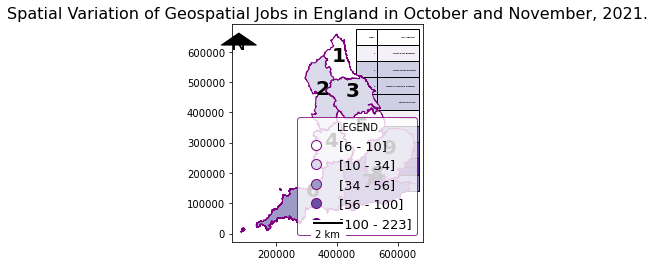

In [20]:
ax = england_job_count.plot(column='job_count', scheme='natural_breaks', cmap = 'Purples',
                 edgecolor = 'purple', legend=True, 
                 legend_kwds={'loc': 'lower right', 'fmt':'{:.0f}', 'fontsize': 13, 
                              'title': 'LEGEND', 'frameon': True, 'facecolor' : 'white', 
                              'edgecolor': 'purple', 
                              'labels' : ['[6 - 10]', '[10 - 34]', '[34 - 56]', '[56 - 100]' ,'[100 - 223]']})


for legend_handle in ax.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('purple')                                                                                                                      

ax.set_title('Spatial Variation of Geospatial Jobs in England in October and November, 2021.', 
             fontdict = {'fontsize': 16, 'fontweight' : 3}, )
x, y, arrow_length = 0.035, 0.96, 0.05
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=15, headwidth=35),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes) 
england_job_count.apply(lambda x: ax.annotate(text=x['LABEL'], xy=x.geometry.centroid.coords[0], ha='center', weight= 'bold', fontsize=20), axis=1)


valeur = np.array([.09,.30,.30, 0.30, .09, .6, .8, 0.9, .6])
colLabels = ['LABEL', 'ITL1 REGION']
label_name = england_job_count[['LABEL', 'NAME']].sort_values(by='LABEL')
tab = ax.table(cellText=label_name.values, colLabels=colLabels, colWidths = [0.1,0.2], loc='upper right', 
               cellColours=plt.cm.Purples(np.c_[valeur,valeur]), 
               colLoc = 'right',)
for (row, col), cell in tab.get_celld().items():
     cell.set_text_props(fontproperties=FontProperties(weight='demi'),)
        
scalebar = ScaleBar(2, "cm", length_fraction=0.25, location='lower center')
ax.add_artist(scalebar)        
        
tab.scale(1.1, 1.35)
plt.rcParams['figure.figsize'] = [20, 15]
#ax.axis('off')
plt.show()